# **WhatsApp** Chat Analysis with **Python**

In [ ]:
 pip install emoji

In [ ]:
pip uninstall emoji


Found existing installation: emoji 2.6.0
Uninstalling emoji-2.6.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/emoji-2.6.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/emoji/*
Proceed (Y/n)? Y
  Successfully uninstalled emoji-2.6.0


In [ ]:
pip install emoji==1.7


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=9bd680c0608523c966880f5f6bd75348f62801b56cd58a14467be7c0c59f4bc0
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = 'WhatsApp Chat with My Mentees.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True )
print(df.tail(20))
# print(df.info())
# print(df.Author.unique())

         Date   Time                    Author  \
0  2023-07-10  23:33                      None   
1  2023-07-10  23:33                      None   
2  2023-07-10  23:36                      None   
3  2023-07-10  23:36                      None   
4  2023-07-12  17:46               Chandru Kpr   
5  2023-07-12  17:46               Chandru Kpr   
6  2023-07-12  17:54                      None   
7  2023-07-12  17:54                      None   
8  2023-07-13  20:35  Mohan Sir Cheaf Mentor 4   
9  2023-07-13  20:36  Mohan Sir Cheaf Mentor 4   
10 2023-07-13  20:53              Jeeva Kpriet   

                                              Message  
0             Chandru Kpr created group "My Mentees✨"  
1                               Chandru Kpr added you  
2   Chandru Kpr added +91 6380 759 594 and +91 807...  
3          Chandru Kpr added Mohan Sir Cheaf Mentor 4  
4   1.Abinaya 2.Aishwarya S 3.Amala Janalia 4.Anus...  
5                 Complete it before today 7,0 clk...  
6   Cha

In [ ]:
total_messages = df.shape[0]
print(total_messages)

11


In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Aman and Sapna
Total Messages:  11
Number of Media Shared:  0
Number of Emojis Shared 0
Number of Links Shared 2


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Aman Kharwal", "Sapna"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[1]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)

Stats of Aman Kharwal -
Messages Sent 0
Average Words per message 0.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Sapna -
Messages Sent 0
Average Words per message 0.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

there is no emoji chat , so there is no **ploting**

There are 1063 words in all the messages.


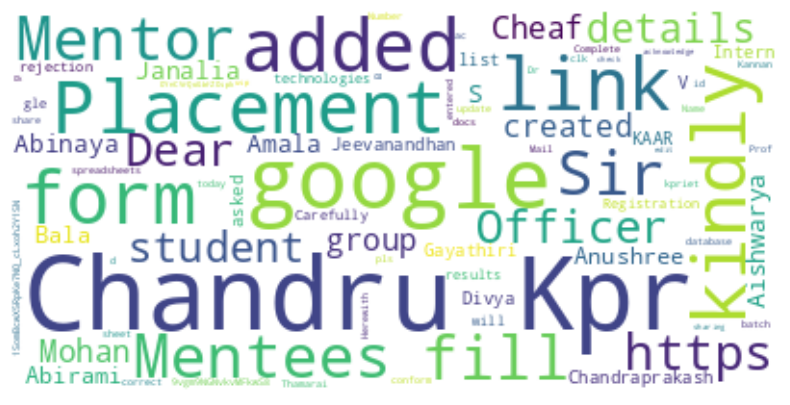

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Chandru Kpr


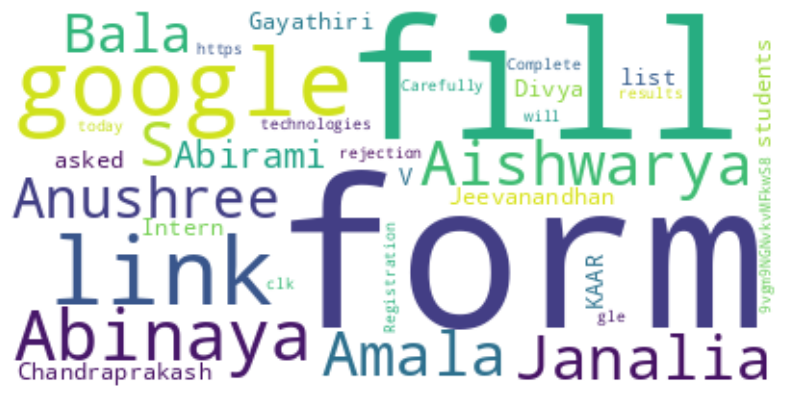

Author name Mohan Sir Cheaf Mentor 4


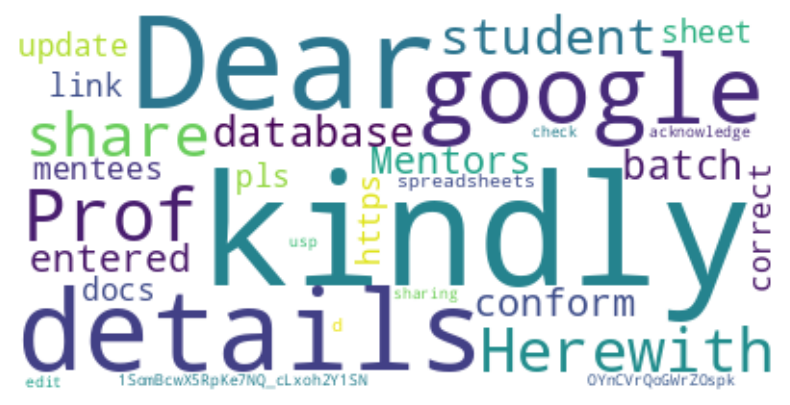

In [ ]:
l = ["Chandru Kpr", "Mohan Sir Cheaf Mentor 4"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

so  by using this way we can easily do Whatsapp analyse and can retrive required information from whole whatsapp chat.